In [165]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('matches.sqlite')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [166]:
matches = pd.read_sql_query("SELECT * FROM matches", conn)

In [167]:
matches.set_index('File')

,TeamA,TeamB,ThirtyScore,FortyScore,FiftyScore,FortyWickets,ThirtyWickets,Date,Result
File,,,,,,,,,
1000887.yaml,Australia,Pakistan,153,193,268,7,5,2017-01-13,Australia
226391.yaml,New Zealand,Sri Lanka,137,184,255,4,2,2006-01-03,New Zealand
335355.yaml,Pakistan,India,181,231,308,4,4,2008-07-02,Pakistan
423792.yaml,New Zealand,Australia,134,195,273,4,4,2010-03-06,Australia
467886.yaml,India,New Zealand,171,229,315,5,4,2010-12-07,India
...,...,...,...,...,...,...,...,...,...
335354.yaml,Bangladesh,Sri Lanka,215,263,332,4,1,2008-06-30,Sri Lanka
423791.yaml,New Zealand,Australia,158,193,275,5,4,2010-03-03,New Zealand
467885.yaml,India,New Zealand,108,156,224,7,7,2010-12-04,India


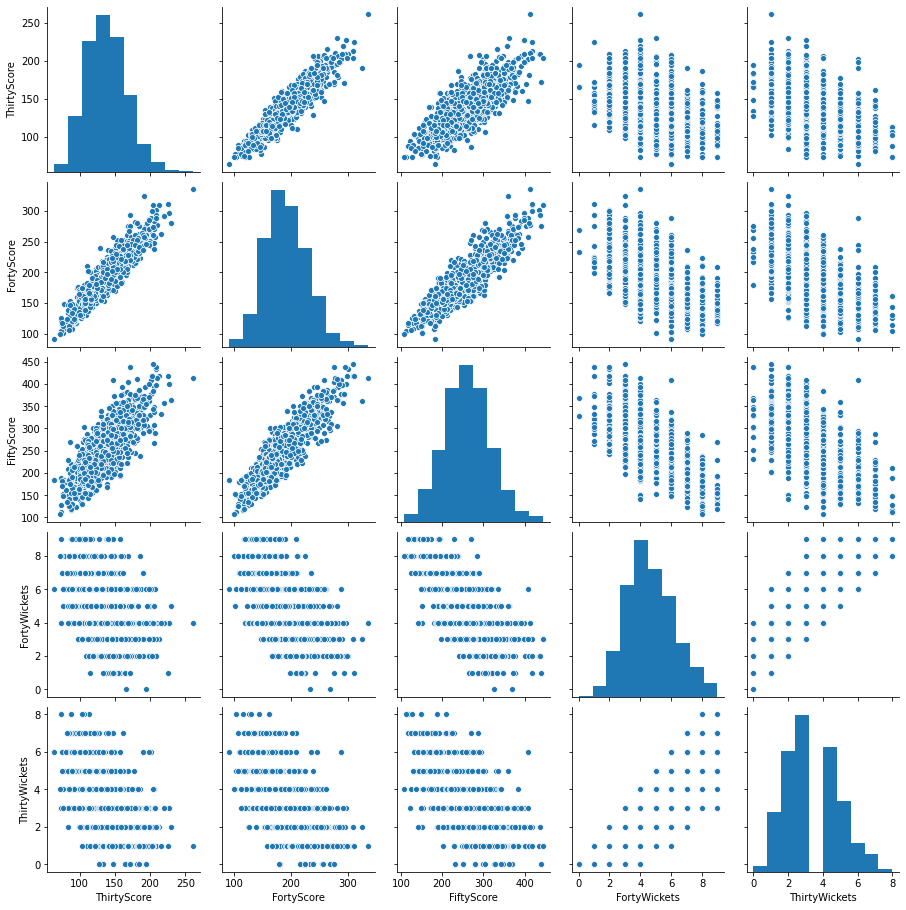

In [168]:
sns.pairplot(matches)

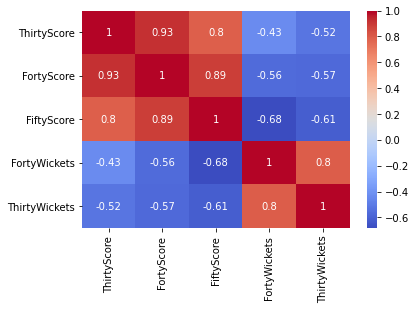

In [169]:
sns.heatmap(matches.corr(), annot=True, cmap='coolwarm')

In [314]:
matches.columns

Index(['File', 'TeamA', 'TeamB', 'ThirtyScore', 'FortyScore', 'FiftyScore',
       'FortyWickets', 'ThirtyWickets', 'Date', 'Result'],
      dtype='object')

In [352]:
X= matches[['ThirtyScore', 'ThirtyWickets']]

In [353]:
y= matches['FortyScore']

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [356]:
from sklearn.linear_model import Lasso

In [357]:
lm = Lasso()

In [358]:
lm.fit(X_train,y_train)

Lasso()

In [359]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
ThirtyScore,1.132222
ThirtyWickets,-2.618342


In [360]:
predictions = lm.predict(X_test)

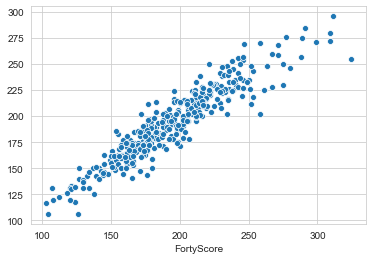

In [371]:
sns.scatterplot(y_test,predictions)
sns.set_style('whitegrid')

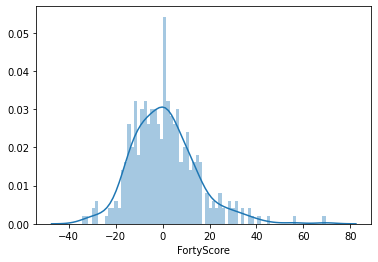

In [362]:
sns.distplot((y_test-predictions),bins=75);

In [363]:
from sklearn import metrics

In [373]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10.47848589587682
MSE: 194.63919014161186
RMSE: 13.95131499686004
